In [2]:
import pandas as pd

def load_data(filepath):
    """ Load the dataset from a specified file path. """
    try:
        data = pd.read_csv(filepath)
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"Failed to load data: {e}")
        return None

def preprocess_data(data):
    """ Convert the 'Emissions.Production.CO2.Cement' to numeric, handling non-numeric gracefully. """
    if 'Emissions.Production.CO2.Cement' in data.columns:
        data['Emissions.Production.CO2.Cement'] = pd.to_numeric(data['Emissions.Production.CO2.Cement'], errors='coerce')
        print("Data preprocessed successfully.")
    else:
        print("Column 'Emissions.Production.CO2.Cement' not found in the data.")
        return None
    return data

def calculate_total_cement_emissions(data):
    """ Calculate the total CO2 emissions from cement. """
    if data is not None:
        total_cement_co2_emissions = data['Emissions.Production.CO2.Cement'].sum()
        print(f"Total CO2 Emissions from Cement: {total_cement_co2_emissions}")
    else:
        print("No data available to calculate emissions.")

# Main function to run the script
def main():
    filepath = r'C:\Users\ssp1_\Downloads\global_emissions.csv'  # Modify with the actual file path
    data = load_data(filepath)
    if data is not None:
        data = preprocess_data(data)
        calculate_total_cement_emissions(data)

if __name__ == "__main__":
    main()


Data loaded successfully.
Data preprocessed successfully.
Total CO2 Emissions from Cement: 26371.273


Data loaded successfully.
Data preprocessed successfully.


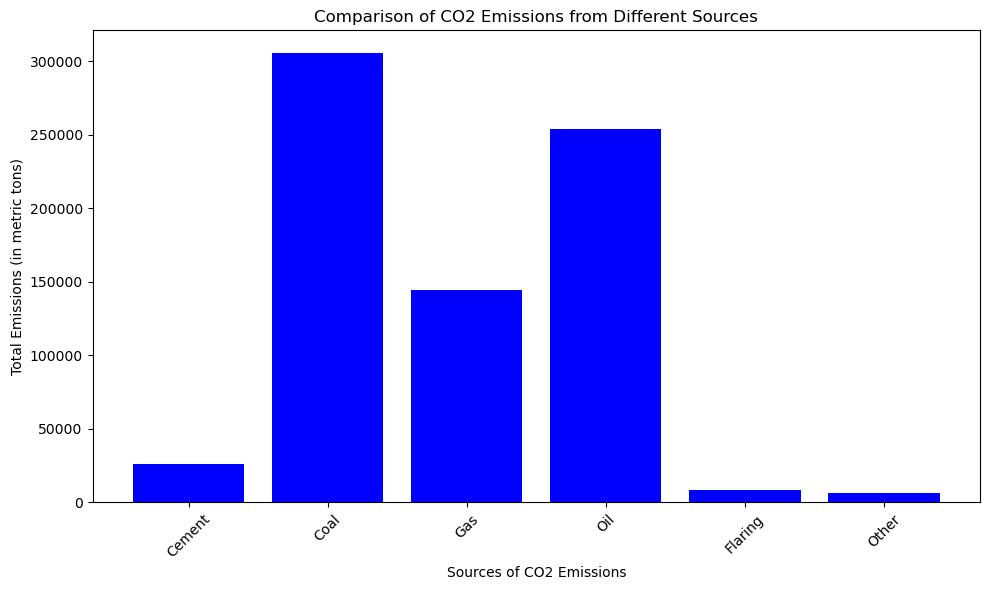

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filepath):
    """ Load the dataset from a specified file path. """
    try:
        data = pd.read_csv(filepath)
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"Failed to load data: {e}")
        return None

def preprocess_data(data):
    """ Convert emission columns to numeric, handling non-numeric gracefully. """
    emission_columns = [
        'Emissions.Production.CO2.Cement', 'Emissions.Production.CO2.Coal',
        'Emissions.Production.CO2.Gas', 'Emissions.Production.CO2.Oil',
        'Emissions.Production.CO2.Flaring', 'Emissions.Production.CO2.Other'
    ]
    for col in emission_columns:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')
    print("Data preprocessed successfully.")
    return data

def calculate_emissions(data):
    """ Calculate total CO2 emissions from various sources and return the results. """
    totals = {}
    if data is not None:
        emission_columns = [
            'Emissions.Production.CO2.Cement', 'Emissions.Production.CO2.Coal',
            'Emissions.Production.CO2.Gas', 'Emissions.Production.CO2.Oil',
            'Emissions.Production.CO2.Flaring', 'Emissions.Production.CO2.Other'
        ]
        for col in emission_columns:
            if col in data.columns:
                totals[col.split('.')[-1]] = data[col].sum()
        return totals
    else:
        print("No data available to calculate emissions.")
        return totals

def plot_emissions(totals):
    """ Plot a bar graph comparing CO2 emissions from different sources. """
    if totals:
        sources = list(totals.keys())
        emissions = list(totals.values())
        plt.figure(figsize=(10, 6))
        plt.bar(sources, emissions, color='blue')
        plt.xlabel('Sources of CO2 Emissions')
        plt.ylabel('Total Emissions (in metric tons)')
        plt.title('Comparison of CO2 Emissions from Different Sources')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No data to plot.")

# Main function to run the script
def main():
    filepath = r'C:\Users\ssp1_\Downloads\global_emissions.csv'  # Modify with the actual file path
    data = load_data(filepath)
    if data is not None:
        data = preprocess_data(data)
        totals = calculate_emissions(data)
        plot_emissions(totals)

if __name__ == "__main__":
    main()


In [5]:
import pandas as pd

def load_data(filepath):
    """ Load the dataset from a specified file path. """
    try:
        data = pd.read_csv(filepath)
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"Failed to load data: {e}")
        return None

def preprocess_data(data):
    """ Convert emission columns to numeric, handling non-numeric gracefully. """
    emission_columns = [
        'Emissions.Production.CO2.Cement', 'Emissions.Production.CO2.Coal',
        'Emissions.Production.CO2.Gas', 'Emissions.Production.CO2.Oil',
        'Emissions.Production.CO2.Flaring', 'Emissions.Production.CO2.Other'
    ]
    for col in emission_columns:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')
    print("Data preprocessed successfully.")
    return data

def calculate_emissions(data):
    """ Calculate and print total CO2 emissions from various sources. """
    if data is not None:
        emission_columns = [
            'Emissions.Production.CO2.Cement', 'Emissions.Production.CO2.Coal',
            'Emissions.Production.CO2.Gas', 'Emissions.Production.CO2.Oil',
            'Emissions.Production.CO2.Flaring', 'Emissions.Production.CO2.Other'
        ]
        totals = {}
        for col in emission_columns:
            if col in data.columns:
                totals[col] = data[col].sum()
                print(f"Total CO2 Emissions from {col.split('.')[-1]}: {totals[col]}")
        
        # Calculate the grand total from all specific sources
        grand_total = sum(totals.values())
        print(f"Grand Total CO2 Emissions: {grand_total}")
    else:
        print("No data available to calculate emissions.")

# Main function to run the script
def main():
    filepath = r'C:\Users\ssp1_\Downloads\global_emissions.csv'   # Modify with the actual file path
    data = load_data(filepath)
    if data is not None:
        data = preprocess_data(data)
        calculate_emissions(data)

if __name__ == "__main__":
    main()


Data loaded successfully.
Data preprocessed successfully.
Total CO2 Emissions from Cement: 26371.273
Total CO2 Emissions from Coal: 305895.518
Total CO2 Emissions from Gas: 144291.365
Total CO2 Emissions from Oil: 253812.29099999997
Total CO2 Emissions from Flaring: 8372.703
Total CO2 Emissions from Other: 6649.215000000006
Grand Total CO2 Emissions: 745392.3649999999


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def load_data(filepath):
    data = pd.read_csv(filepath)
    return data

def preprocess_data(data):
    # Remove non-numeric and non-relevant columns for simplicity
    data.drop(columns=['Country.Name', 'Country.Code'], inplace=True)
    data = data.select_dtypes(include=[np.number]).dropna()  # Keep only numeric columns and drop rows with NaN
    return data

def build_and_train_model(data):
    # Define predictors and target
    X = data.drop('Emissions.Production.CO2.Total', axis=1)
    y = data['Emissions.Production.CO2.Total']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return model, mse, rmse, mae, r2

def main():
    filepath = r'C:\Users\ssp1_\Downloads\global_emissions.csv'
    data = load_data(filepath)
    data = preprocess_data(data)
    model, mse, rmse, mae, r2 = build_and_train_model(data)
    print(f"Model trained. MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}")

if __name__ == "__main__":
    main()


Model trained. MSE: 0.04402868158042508, RMSE: 0.20983012553116648, MAE: 0.12031567715101153, R^2: 0.9999999561488495
